# Mental Health matters, always and everywhere

## Introduction

In this jupyter notebook I will explore the data that was found on Kaggle about Mental Health. The data consists of several factors, such as countries, years, mental and substance use, prevalence of depression and so on. This dataset will mainly be used to learn more skills, such as plotting data on world map and more useful and easy to read and understand visualisations.


### Geospatial Data Visualisation
Geographic data is a subset of Data Science that deals with location-based data. Geo data is important nowadays, since most businesses and applications revolve around the location element. Visualisations can be important to derive faster insights from location-based datasets.

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import folium

In [160]:
prevalence_depression = pd.read_csv('/Users/Roz/Documents/mental_health_project/data/prevalence-of-depression-males-vs-females.csv')
prevalence_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56395 entries, 0 to 56394
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             56395 non-null  object 
 1   Code                                                                               54079 non-null  object 
 2   Year                                                                               56395 non-null  int64  
 3   Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)    6840 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)  6840 non-null   float64
 5   Population (historical estimates)                                                  55656 non-null  floa

In [161]:
prevalence_depression = prevalence_depression.rename(columns={"Entity":"Country", "Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)": "Prevalence_depr_male",
                        "Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)" : "Prevalence_depr_female", "Population (historical estimates)": "Population_estimate"})

prevalence_depression.head()

,Country,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,NaN
2,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,NaN
3,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,NaN
4,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,NaN


In [162]:
prevalence_depression.isnull().sum()

Country                       0
Code                       2316
Year                          0
Prevalence_depr_male      49555
Prevalence_depr_female    49555
Population_estimate         739
Continent                 56110
dtype: int64

In [163]:
prevalence_depression = prevalence_depression.drop(['Continent', 'Code'], axis = 1) #delete unnecessary columns
prevalence_depression.dropna(how='any', inplace=True)

In [164]:
prevalence_depression.isnull().sum()

Country                   0
Year                      0
Prevalence_depr_male      0
Prevalence_depr_female    0
Population_estimate       0
dtype: int64

In [165]:
import geopandas as gpd

# access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get a list (dataframe) of country centroids
centroids = world.centroid
centroid_list = pd.concat([world.name, centroids], axis=1)

centroid_list
# Plot the results
# base = world.plot(column = 'name', cmap = 'Blues')
# centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5)


/var/folders/kc/2ljthnk9065g3hvg5071ltxw0000gn/T/ipykernel_30522/601855778.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = world.centroid


,name,0
0,Fiji,POINT (163.85316 -17.31631)
1,Tanzania,POINT (34.75299 -6.25773)
2,W. Sahara,POINT (-12.13783 24.29117)
3,Canada,POINT (-98.14238 61.46908)
4,United States of America,POINT (-112.59944 45.70563)
...,...,...
172,Serbia,POINT (20.81965 44.23304)
173,Montenegro,POINT (19.28618 42.78904)
174,Kosovo,POINT (20.89536 42.57937)
175,Trinidad and Tobago,POINT (-61.33037 10.42824)


In [166]:
centroid_list = centroid_list.rename(columns={0:"coordinates", 'name':'Country'})
centroid_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Country      177 non-null    object  
 1   coordinates  177 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 2.9+ KB


In [167]:
# centroid_list[['x_cor', 'y_cor']] = centroid_list.coordinates.str.split("(", expand = True) ignore

mergedDF = pd.merge(prevalence_depression, centroid_list, on = "Country")

mergedDF
#mergedDF.isnull().sum() # check whether there are null values

,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,coordinates
0,Afghanistan,1990,4.291054,5.859656,12412311.0,POINT (66.08669 33.85640)
1,Afghanistan,1991,4.293268,5.853078,13299016.0,POINT (66.08669 33.85640)
2,Afghanistan,1992,4.298265,5.850020,14485543.0,POINT (66.08669 33.85640)
3,Afghanistan,1993,4.303087,5.844987,15816601.0,POINT (66.08669 33.85640)
4,Afghanistan,1994,4.306053,5.843623,17075728.0,POINT (66.08669 33.85640)
...,...,...,...,...,...,...
4735,Zimbabwe,2015,3.090039,3.927306,13814642.0,POINT (29.78855 -18.90699)
4736,Zimbabwe,2016,3.094447,3.938356,14030338.0,POINT (29.78855 -18.90699)
4737,Zimbabwe,2017,3.097194,3.946231,14236599.0,POINT (29.78855 -18.90699)
4738,Zimbabwe,2018,3.092207,3.947673,14438812.0,POINT (29.78855 -18.90699)


In [168]:
mergedDF.describe() # The standard deviation is a measure that tells how spread out a group of numbers in a dataset are

,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate
count,4740.000000,4740.000000,4740.000000,4.740000e+03
mean,2004.500000,3.174508,4.798148,3.858892e+07
std,8.656355,0.847250,1.176886,1.404568e+08
min,1990.000000,1.313565,1.962957,5.560400e+04
25%,1997.000000,2.603879,3.904168,3.625902e+06
50%,2004.500000,3.148444,4.835156,9.583242e+06
75%,2012.000000,3.676174,5.554892,2.638706e+07
max,2019.000000,7.258704,8.977151,1.433784e+09


<function matplotlib.pyplot.show(close=None, block=None)>

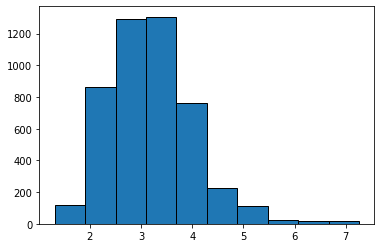

In [169]:
plt.hist(mergedDF['Prevalence_depr_male'], edgecolor="black")
plt.show

# plt.boxplot(mergedDF['Prevalence_depr_male'])
# plt.show

In [170]:
def prev_categorized (row):
    if row['Prevalence_depr_male'] >= 3.676174 :
        return 'high'
    elif row['Prevalence_depr_male'] >= 2.603879 :
        return 'moderate'
    else:
        return 'low'

mergedDF.apply(lambda row: prev_categorized(row), axis=1)

0           high
1           high
2           high
3           high
4           high
          ...   
4735    moderate
4736    moderate
4737    moderate
4738    moderate
4739    moderate
Length: 4740, dtype: object

In [171]:
mergedDF['Prevalence_male'] = mergedDF.apply(lambda row: prev_categorized(row), axis=1)
mergedDF

,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,coordinates,Prevalence_male
0,Afghanistan,1990,4.291054,5.859656,12412311.0,POINT (66.08669 33.85640),high
1,Afghanistan,1991,4.293268,5.853078,13299016.0,POINT (66.08669 33.85640),high
2,Afghanistan,1992,4.298265,5.850020,14485543.0,POINT (66.08669 33.85640),high
3,Afghanistan,1993,4.303087,5.844987,15816601.0,POINT (66.08669 33.85640),high
4,Afghanistan,1994,4.306053,5.843623,17075728.0,POINT (66.08669 33.85640),high
...,...,...,...,...,...,...,...
4735,Zimbabwe,2015,3.090039,3.927306,13814642.0,POINT (29.78855 -18.90699),moderate
4736,Zimbabwe,2016,3.094447,3.938356,14030338.0,POINT (29.78855 -18.90699),moderate
4737,Zimbabwe,2017,3.097194,3.946231,14236599.0,POINT (29.78855 -18.90699),moderate
4738,Zimbabwe,2018,3.092207,3.947673,14438812.0,POINT (29.78855 -18.90699),moderate


In [172]:
def prev_categorized (row):
    if row['Prevalence_depr_female'] >= 3.676174 :
        return 'high'
    elif row['Prevalence_depr_female'] >= 2.603879 :
        return 'moderate'
    else:
        return 'low'

mergedDF['Prevalence_female'] = mergedDF.apply(lambda row: prev_categorized(row), axis=1)
mergedDF

,Country,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,coordinates,Prevalence_male,Prevalence_female
0,Afghanistan,1990,4.291054,5.859656,12412311.0,POINT (66.08669 33.85640),high,high
1,Afghanistan,1991,4.293268,5.853078,13299016.0,POINT (66.08669 33.85640),high,high
2,Afghanistan,1992,4.298265,5.850020,14485543.0,POINT (66.08669 33.85640),high,high
3,Afghanistan,1993,4.303087,5.844987,15816601.0,POINT (66.08669 33.85640),high,high
4,Afghanistan,1994,4.306053,5.843623,17075728.0,POINT (66.08669 33.85640),high,high
...,...,...,...,...,...,...,...,...
4735,Zimbabwe,2015,3.090039,3.927306,13814642.0,POINT (29.78855 -18.90699),moderate,high
4736,Zimbabwe,2016,3.094447,3.938356,14030338.0,POINT (29.78855 -18.90699),moderate,high
4737,Zimbabwe,2017,3.097194,3.946231,14236599.0,POINT (29.78855 -18.90699),moderate,high
4738,Zimbabwe,2018,3.092207,3.947673,14438812.0,POINT (29.78855 -18.90699),moderate,high
